In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
def deal(num):
    #read data
    path = r'C:\Users\Ordinary\Desktop\6.7\onedata_'
    csv = '_1_1.csv'
    filename = path+str(num)+csv
    data = pd.read_csv(filename,header=None)
    print(data.describe())
    print(data.shape)
    
    #pca
    pca=PCA(n_components=3)
    data_pca = pca.fit_transform(data)
    print(pca.explained_variance_ratio_)
    print(data_pca.shape)
    fig = plt.figure(1, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    data_pca_t=np.transpose(data_pca)
    for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
        xs = data_pca_t[0,]
        ys = data_pca_t[1,]
        zs = data_pca_t[2,]
        ax.scatter(xs, ys, zs, c=c)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
    #elbow
    maxK = 15
    seed_centroids = None
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data_pca)
            #data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data_pca)
            #data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()

    
    #cluster
    num_clusters = 4
    km_cluster = KMeans(n_clusters=num_clusters, max_iter=300, n_init=40, \
                        init='k-means++',n_jobs=-1)
    result = km_cluster.fit_predict(data_pca)
    
    #plot cluster result
    fig = plt.figure(1, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    data_pca_t=np.transpose(data_pca)
    for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
        xs = data_pca_t[0,]
        ys = data_pca_t[1,]
        zs = data_pca_t[2,]
        ax.scatter(xs, ys, zs, c=result)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
    
    return 

                0           1           2           3           4    \
count  1.280000e+02  128.000000  128.000000  128.000000  128.000000   
mean   3.036946e-06    9.914644    5.248275    4.000185    3.237848   
std    5.906480e-07    1.598583    0.751609    0.884927    0.714721   
min    1.912200e-06    7.221300    2.981000    2.124200    1.746500   
25%    2.615825e-06    8.893050    4.799375    3.221775    2.709500   
50%    3.015250e-06    9.410500    5.275800    3.986000    3.155800   
75%    3.413750e-06   10.463000    5.609350    4.818125    3.816025   
max    4.463100e-06   19.395000    7.590700    5.889800    4.451600   

              5           6           7           8           9       ...      \
count  128.000000  128.000000  128.000000  128.000000  128.000000     ...       
mean     2.707506    2.288784    2.254390    1.977759    1.773423     ...       
std      0.643720    0.462097    0.510714    0.414227    0.432571     ...       
min      1.411100    1.140700    0.9

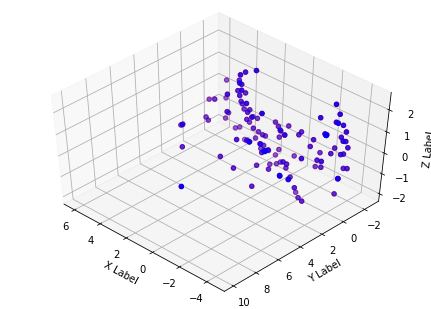

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14


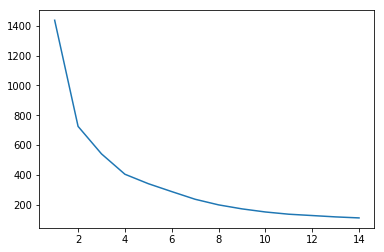

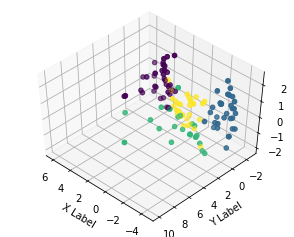

In [53]:
deal(1)